# Capstone Project - Car Accident Severity Prediction (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

### Backgroud

The World Health Organization describes the road traffic system as the most complex and the most dangerous system with which people have to deal every day. In the last few years, the number of road traffic deaths in the world climbed, reaching 1.35 million in 2016. More particularly in Seattle City, 375 people were killed since 2004, more than a thousand were seriously injured and tens of thousands have suffered small injuries.

Meanwhile, Big Data Analytics has emerged in the last decade as a set of techniques allowing data scientists to extract meaningful information from large amounts of complex and heterogeneous data. In the context of accident prediction, such techniques provide insights on the conditions leading to an increased risk of road accidents, which in return, can be used to develop traffic-related policies and prevention operations.

### Problem

Collision severity is the quantification of the intensity of an impact. In traffic accident reconstruction, the impact of interest is typically between two vehicles (e.g. automobile, truck, bus, motorcycle, or bicycle), between a vehicle occupant and the vehicle interior, between a vehicle and pedestrian, or between a vehicle and a fixed object (e.g. building, wall, tree, rock, or other landscape feature).

The significance of determining collision severity in an accident reconstruction is that it is an indicator of the probability of injury. Clearly, the higher the severity level or the greater the accelerations that are involved in a traffic collision, the greater the chances are that an injury will occur. The response of the human body when subjected to a collision with a quantified severity level and principal direction of force forms the bases for biomechanical analyses and occupant protection system performance in a motor vehicle collision.

This project we are going to to build a model to predition the severity of collisions, this is a classification problem.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* collision type
* number of people, bicycles, vehicles involved in collisions
* number of injuries, fatalities in collisions
* road condition, light condition
* influence of drugs or alcohol and so on
* speeding or hit parked cars
* address and location collisions occurred

### data source

We get the data of collisions from the government website of The Seattle City, updated at October 3, 2020  
https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d

### data summary

This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.

There is the data attributes information:   https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# download the data and load
# get dataset from http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D

df = pd.read_csv('./data/Collisions.csv')
df.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(221525, 40)

There are 221525 rows about Seattle Collision Accident.

In [3]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

There are about 40 attributes of our collison dataset. Let's have a look at it.

In [4]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.268354e+06,265256.609668,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,1.259316e+06,202173.388163,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,1.264342e+06,259613.000382,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,1.279221e+06,222017.872023,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,1.262205e+06,242179.124204,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


### target label summary

The target label is the SEVERITYCODE column, and the SEVERITYDESC column is of it's description, but we can not use them as features for our prediction, it is the target of our model to study.

In [5]:
# summary of the label column
print(df['SEVERITYCODE'].unique().tolist())
print(df['SEVERITYDESC'].unique().tolist())
print(df['SEVERITYCODE'].value_counts())

['2', '1', '0', '3', '2b', nan]
['Injury Collision', 'Property Damage Only Collision', 'Unknown', 'Fatality Collision', 'Serious Injury Collision']
1     137671
2      58783
0      21615
2b      3105
3        350
Name: SEVERITYCODE, dtype: int64


We find there is a NaN value in our label column, we will fix it later.

## Methodology <a name="methodology"></a>

Follow Cross-industry standard process for data mining: CRISP-DM, we should do:
* business understanding
* data understanding
* data preparation
* modeling
* evaluation

## Analysis <a name="analysis"></a>

### feature selection

First, let's understand the dataset, there are many XXXKEY columns in the collision dataset, they are maybe the FOREIGN KEYs to relate other datasets, here we need not them.

Then let's watch other columns, get their value counts to determine wheather these features will be selected. We plot the histogram of them.

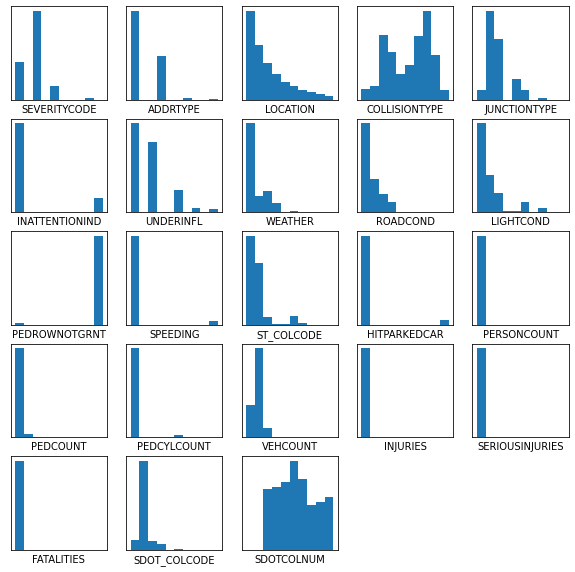

In [6]:
# feature selection
columns = ['SEVERITYCODE','ADDRTYPE', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 
           'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 
           'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR',
           'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 
           'SERIOUSINJURIES', 'FATALITIES', 'SDOT_COLCODE', 'SDOTCOLNUM']

# display distribution of features
plt.figure(figsize=(10,10))
for i in range(len(columns)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.hist(df[columns[i]])
    plt.xlabel(columns[i])
plt.show()

### data preprocessing

Now we remove the row that the SEVERITYCODE is null.

In [7]:
# remove the row with target column has null value
raw_data = df[columns]
raw_data = raw_data[~raw_data.SEVERITYCODE.isnull()]
raw_data.shape

(221524, 23)

In [8]:
# make raw feature for preprocessing
raw_feature = raw_data.copy()
raw_feature.drop('SEVERITYCODE', axis=1, inplace=True)
raw_feature.shape

(221524, 22)

### missing value filling

In [9]:
# missing value filling & category and numeric processing
category_columns = []
numeric_columns = []

for col in raw_feature.columns:
    if raw_feature[col].dtypes == 'object':
        # find category columns
        category_columns.append(col)
        raw_feature[col].fillna('', inplace=True)
    else:
        # find numeric columns
        numeric_columns.append(col)
        raw_feature[col].fillna(0, inplace=True)

# missing value statistic
for col in raw_feature.columns:
    print(col, raw_feature[col].dtypes, raw_feature[col].isnull().sum())

ADDRTYPE object 0
LOCATION object 0
COLLISIONTYPE object 0
JUNCTIONTYPE object 0
INATTENTIONIND object 0
UNDERINFL object 0
WEATHER object 0
ROADCOND object 0
LIGHTCOND object 0
PEDROWNOTGRNT object 0
SPEEDING object 0
ST_COLCODE object 0
HITPARKEDCAR object 0
PERSONCOUNT int64 0
PEDCOUNT int64 0
PEDCYLCOUNT int64 0
VEHCOUNT int64 0
INJURIES int64 0
SERIOUSINJURIES int64 0
FATALITIES int64 0
SDOT_COLCODE float64 0
SDOTCOLNUM float64 0


### duplicate value processing

#### Feature UNDERINFL processing
Feature UNDERINFL has the different value represent same meaning, we need to make them standard.  

In [10]:
# duplicate value processing
print(raw_feature['UNDERINFL'].value_counts())

def deal_underinfl(x):
    if x == '0' or x == '':
        return 'N'
    if x == '1':
        return 'Y'
    return x
    
raw_feature['UNDERINFL'] = raw_feature['UNDERINFL'].apply(deal_underinfl)
print(raw_feature['UNDERINFL'].value_counts())


N    103926
0     81676
      26293
Y      5399
1      4230
Name: UNDERINFL, dtype: int64
N    211895
Y      9629
Name: UNDERINFL, dtype: int64


so, UNDERINFL has only two values Y/N.

#### Feature SDOT_COLCODE/SDOTCOLNUM processing

In [11]:
# cast data type
raw_feature['SDOT_COLCODE'] = raw_feature['SDOT_COLCODE'].astype('int')
raw_feature['SDOTCOLNUM'] = raw_feature['SDOTCOLNUM'].astype('int')
raw_feature.dtypes

ADDRTYPE           object
LOCATION           object
COLLISIONTYPE      object
JUNCTIONTYPE       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
ST_COLCODE         object
HITPARKEDCAR       object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INJURIES            int64
SERIOUSINJURIES     int64
FATALITIES          int64
SDOT_COLCODE        int64
SDOTCOLNUM          int64
dtype: object

#### Feature ST_COLCODE processing
Feature ST_COLCODE has duplicate values also, and the values have different types, we need to make them standard also.

In [12]:
# multi value processing
print(raw_feature['ST_COLCODE'].unique().tolist())

def del_st_colcode(x):
    if x == ' ':
        return ''
    if isinstance(x, float):
        return str(int(x))
    return x

raw_feature['ST_COLCODE'] = raw_feature['ST_COLCODE'].apply(del_st_colcode)
print(raw_feature['ST_COLCODE'].unique().tolist())

['45', '0', '10', ' ', '28', '71', '14', '15', '19', '23', '26', '50', '', '21', '32', '2', '13', '11', '12', '6', '22', '74', '1', '16', '51', '20', '81', '30', '56', '3', '5', '52', '4', '7', '18', '40', '83', '66', '25', '57', '72', '41', '24', '53', '29', '27', '73', '17', '65', '82', '49', '67', '84', '31', '42', '48', '43', '64', 10.0, 32.0, 22.0, 14.0, 50.0, 30.0, 23.0, 13.0, 11.0, 12.0, 0.0, 45.0, 16.0, 28.0, 42.0, 1.0, 21.0, 20.0, 27.0, 74.0, 15.0, 19.0, 81.0, 52.0, 24.0, 71.0, 2.0, 29.0, 51.0, 67.0, 83.0, 57.0, 26.0, 25.0, 48.0, 4.0, 40.0, 73.0, 3.0, 64.0, 72.0, 65.0, 53.0, 82.0, 84.0, 41.0, 66.0, 56.0, 31.0, '54', '60', '87', '8', '85', '88']
['45', '0', '10', '', '28', '71', '14', '15', '19', '23', '26', '50', '21', '32', '2', '13', '11', '12', '6', '22', '74', '1', '16', '51', '20', '81', '30', '56', '3', '5', '52', '4', '7', '18', '40', '83', '66', '25', '57', '72', '41', '24', '53', '29', '27', '73', '17', '65', '82', '49', '67', '84', '31', '42', '48', '43', '64', '54',

### Category features processing

We use LabelEncoder() function of sklearn to deal with category features

In [13]:
# category features processing
from sklearn.preprocessing import LabelEncoder

X_category = raw_feature[category_columns].values
print(X_category[:5])

for i, col in enumerate(category_columns):
    le = LabelEncoder()
    le.fit(raw_feature[category_columns[i]].unique().tolist())
    X_category[:,i] = le.transform(X_category[:,i])
    
print(X_category[:5])

[['Block' 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST' 'Cycles'
  'Driveway Junction' '' 'N' 'Clear' 'Dry' 'Daylight' 'Y' '' '45' 'N']
 ['Block' '35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST' 'Pedestrian'
  'Mid-Block (not related to intersection)' '' 'N' 'Overcast' 'Dry'
  'Dark - Street Lights On' '' '' '0' 'N']
 ['Intersection' '3RD AVE NW AND NW 100TH ST' 'Angles'
  'At Intersection (intersection related)' '' 'N' 'Overcast' 'Wet'
  'Daylight' '' '' '10' 'N']
 ['Intersection' 'M L KING JR WAY S AND S JACKSON ST' ''
  'At Intersection (intersection related)' '' 'N' '' '' '' '' '' '' 'N']
 ['Block' 'W EWING ST BETWEEN 6TH AVE W AND W EWING PL' ''
  'Mid-Block (not related to intersection)' '' 'N' '' '' '' '' '' '' 'N']]
[[2 11154 2 3 0 0 3 1 6 1 0 33 0]
 [2 6298 7 5 0 0 6 1 3 0 0 1 0]
 [3 7091 1 2 0 0 6 9 6 0 0 3 0]
 [3 16055 0 2 0 0 0 0 0 0 0 0 0]
 [2 24322 0 5 0 0 0 0 0 0 0 0 0]]


### Numeric features processing

In [14]:
# numeric features processing
X_numeric = raw_feature[numeric_columns].values

### Feature dataset

concat category and numeric features by using np.append function

In [15]:
# feature dataset: concat category and numerfic features
X = np.append(X_category, X_numeric, axis=1)

print(X_category.shape)
print(X_numeric.shape)
print(X.shape)

X_names = []
X_names.extend(category_columns)
X_names.extend(numeric_columns)
print(X_names, len(X_names))
print(X[0:5])

(221524, 13)
(221524, 9)
(221524, 22)
['ADDRTYPE', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'SDOT_COLCODE', 'SDOTCOLNUM'] 22
[[2 11154 2 3 0 0 3 1 6 1 0 33 0 2 0 1 1 1 0 0 18 0]
 [2 6298 7 5 0 0 6 1 3 0 0 1 0 7 1 0 1 1 0 0 24 6015003]
 [3 7091 1 2 0 0 6 9 6 0 0 3 0 2 0 0 2 0 0 0 14 0]
 [3 16055 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 14 0]
 [2 24322 0 5 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


### Label dataset

just use value of column SEVERITYCODE in our raw data copy.

In [16]:
# label dataset
y = raw_data['SEVERITYCODE'].values
y.shape

(221524,)

### Training and testing dataset

In [17]:
# split training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(155066, 22) (155066,)
(66458, 22) (66458,)


### Modeling

use decision tree classification model for modeling test with hyper parameter max_depth 5.

In [18]:
# train dicision tree classifier model
from sklearn.tree import DecisionTreeClassifier

max_depth = 5
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
model_tree.fit(X_train, y_train)

# predict with test data
yhat_tree = model_tree.predict(X_test)

print(yhat_tree[0:10])
print(y_test[0:10])

['1' '2' '0' '1' '1' '0' '1' '2' '1' '1']
['1' '2' '0' '1' '1' '0' '1' '2' '1' '1']


### Evaluation

we got the accuracy score 0.994989, good performance, dicision tree classification model works well.

In [19]:
# evaluation
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

DecisionTrees's Accuracy:  0.9949893165608354


### Hyper parameter tuning

Is the max_depth hyper parameter best? let's try to find the best one. 
Make a loop of max_depth to test model accuracy score from 3 to 19.

In [20]:
# find the best model
depth_arr = []
accuracy_arr = []
model_arr = []

depthes = 20
for d in range(3, depthes):
    # change depthes
    model = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    
    # fit and predict
    model.fit(X_train, y_train)
    yhat_tree = model.predict(X_test)
    
    # calculate accuracy
    acc = metrics.accuracy_score(y_test, yhat_tree)
    print('depth:', d, 'acc:', acc)
    
    # save to list
    depth_arr.append(d)    
    accuracy_arr.append(acc)
    model_arr.append(model)


depth: 3 acc: 0.9895874085888832
depth: 4 acc: 0.9930482409943122
depth: 5 acc: 0.9949893165608354
depth: 6 acc: 0.9954858707755274
depth: 7 acc: 0.9954708236781125
depth: 8 acc: 0.9956062475548467
depth: 9 acc: 0.9958319540160703
depth: 10 acc: 0.995877095308315
depth: 11 acc: 0.9958470011134852
depth: 12 acc: 0.9957567185289957
depth: 13 acc: 0.9956363417496765
depth: 14 acc: 0.9954858707755274
depth: 15 acc: 0.9953955881910379
depth: 16 acc: 0.9954256823858678
depth: 17 acc: 0.9952752114117187
depth: 18 acc: 0.99506455204791
depth: 19 acc: 0.995049504950495


Text(0.5, 0, 'max_depth')

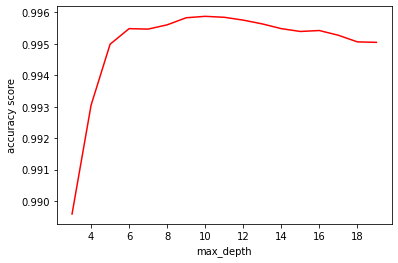

In [21]:
plt.plot(depth_arr, accuracy_arr, 'r-')
plt.ylabel('accuracy score')
plt.xlabel('max_depth')

In [22]:
# find the best model
    
ind = np.argmax(accuracy_arr)
print(ind, depth_arr[ind], accuracy_arr[ind])

best_model_tree = model_arr[ind]

# get the predict result
yhat_tree = best_model_tree.predict(X_test)

print(yhat_tree[0:10])
print(y_test[0:10])

7 10 0.995877095308315
['1' '2' '1' '1' '1' '0' '1' '2' '1' '1']
['1' '2' '0' '1' '1' '0' '1' '2' '1' '1']


Now, we get the best max_depth as it's 10, the accuracy score is the highest 0.995877 

## Results and Discussion <a name="results"></a>

### Classification report

In [23]:
# model performance
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Compute confusion matrix
labels = ['2', '1', '0', '3', '2b']
classes = ['Injury', 'Property Damage', 'Unknown', 'Fatality', 'Serious Injury']

cnf_matrix = confusion_matrix(y_test, yhat_tree, labels=labels)
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6550
           1       1.00      1.00      1.00     41074
           2       1.00      1.00      1.00     17781
          2b       1.00      0.98      0.99       937
           3       1.00      1.00      1.00       116

    accuracy                           1.00     66458
   macro avg       0.99      0.99      0.99     66458
weighted avg       1.00      1.00      1.00     66458



### Ploting Result

In [24]:
# display confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17777     0     0     0     4]
 [    0 40913   161     0     0]
 [    0    94  6456     0     0]
 [    0     0     0   116     0]
 [   15     0     0     0   922]]


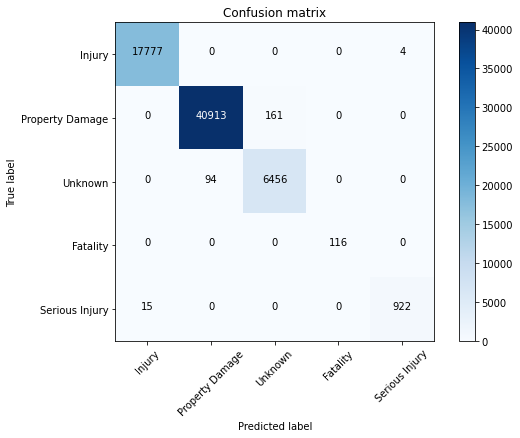

In [25]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      normalize=False,  title='Confusion matrix')

## Conclusion <a name="conclusion"></a>

In [26]:
print("Feature importances:\n{}".format(best_model_tree.feature_importances_))

Feature importances:
[4.01e-04 8.13e-04 0.00e+00 2.05e-04 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 6.86e-04 3.26e-03 3.40e-02 6.06e-05 0.00e+00
 2.53e-01 6.32e-01 5.84e-02 1.17e-02 4.50e-03 3.21e-04]


### Plot feature importance

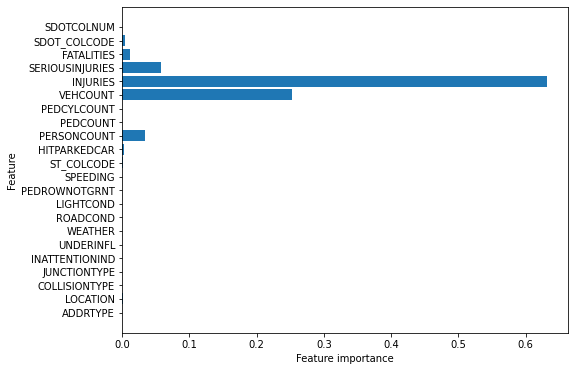

In [27]:
# plot feature importance
def plot_feature_importance(model, feature_num, feature_names):
    plt.barh(range(feature_num), model.feature_importances_, align='center')
    plt.yticks(np.arange(feature_num), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plt.figure(figsize=(8,6))    
plot_feature_importance(best_model_tree, X.data.shape[1], X_names)